In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

In [6]:
target_column = df.columns[-1]
print(f"Using '{target_column}' as the target column")

Using 'species' as the target column


In [7]:
df[target_column] = df[target_column].astype('category').cat.codes


In [8]:
X = df.drop(target_column, axis=1)
y = df[target_column]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
print("\nK vs Accuracy:")
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc:.2f}")


K vs Accuracy:
K = 1: Accuracy = 0.97
K = 2: Accuracy = 1.00
K = 3: Accuracy = 1.00
K = 4: Accuracy = 1.00
K = 5: Accuracy = 1.00
K = 6: Accuracy = 1.00
K = 7: Accuracy = 1.00
K = 8: Accuracy = 1.00
K = 9: Accuracy = 1.00
K = 10: Accuracy = 1.00
K = 11: Accuracy = 1.00
K = 12: Accuracy = 1.00
K = 13: Accuracy = 1.00
K = 14: Accuracy = 1.00
K = 15: Accuracy = 1.00
K = 16: Accuracy = 1.00
K = 17: Accuracy = 1.00
K = 18: Accuracy = 0.97
K = 19: Accuracy = 0.97
K = 20: Accuracy = 0.97


In [12]:
best_k = 3
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"\nBest K = {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred))




Best K = 3
Accuracy: 1.0


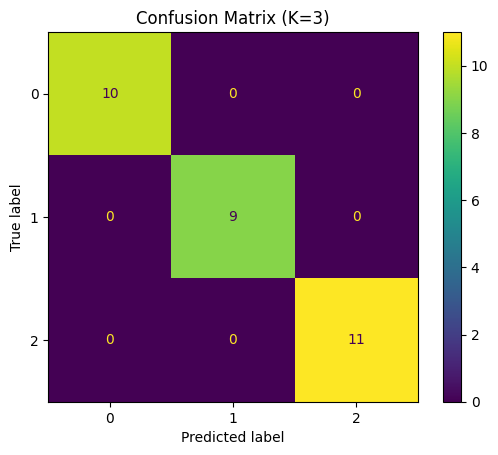

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.savefig("confusion_matrix.png")
plt.show()


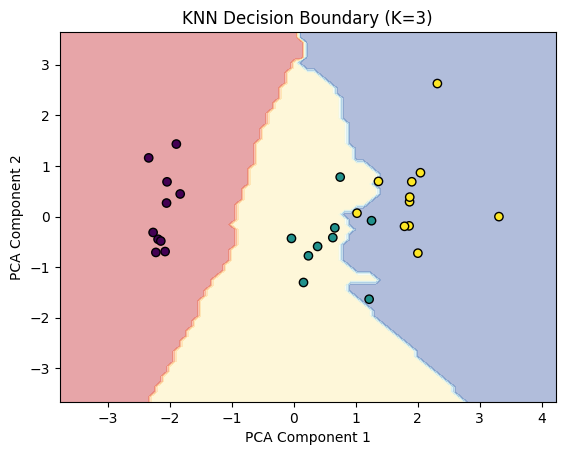

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = KNeighborsClassifier(n_neighbors=best_k)
model_pca.fit(X_train_p, y_train_p)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_test_p, edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("decision_boundary.png")
plt.show()
